In [1]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [2]:
# Charger le dataset Fashion MNIST depuis TensorFlow
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Afficher les formes (dimensions) des données
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


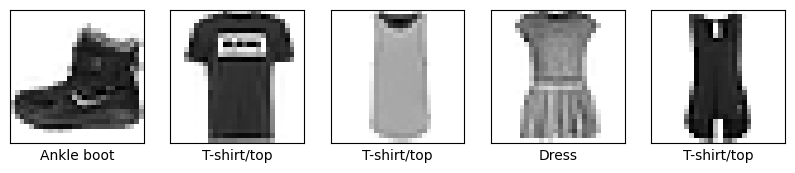

In [3]:
# Liste des classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Afficher les 5 premières images
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [4]:
# Normaliser les images (mettre les pixels entre 0 et 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape les images pour ajouter la dimension "canal" (nécéssaire pour CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Nouvelle forme de X_train:", X_train.shape)
print("Nouvelle forme de X_test:", X_test.shape)


Nouvelle forme de X_train: (60000, 28, 28, 1)
Nouvelle forme de X_test: (10000, 28, 28, 1)


In [5]:
# Créer le modèle CNN
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Résumé du modèle
model.summary()


C:\Users\saz20\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7597 - loss: 0.6614 - val_accuracy: 0.8699 - val_loss: 0.3756
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8802 - loss: 0.3282 - val_accuracy: 0.8866 - val_loss: 0.3140
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9011 - loss: 0.2742 - val_accuracy: 0.8923 - val_loss: 0.3002
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9111 - loss: 0.2436 - val_accuracy: 0.9055 - val_loss: 0.2687
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9220 - loss: 0.2114 - val_accuracy: 0.8984 - val_loss: 0.2702
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9291 - loss: 0.1935 - val_accuracy: 0.9080 - val_loss: 0.2604
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9335 - loss: 0.1767 - val_accuracy: 0.9109 - val_loss: 0.2622
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9400 - loss: 0

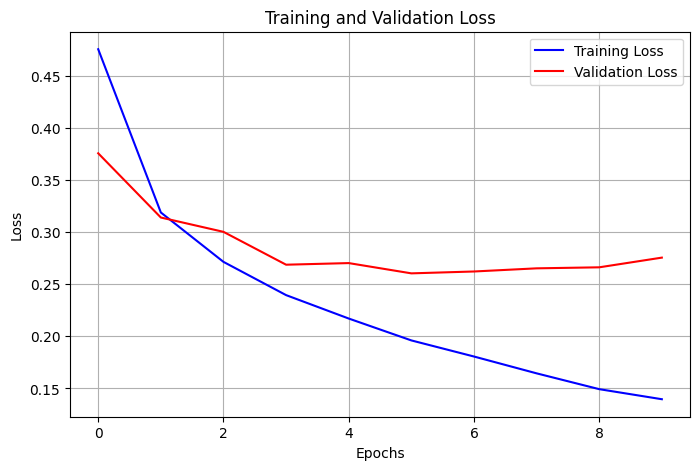

In [8]:
# Graphe de la loss (entraînement + validation)
# Importer matplotlib pour les graphiques
#Voir si ton modèle apprend correctement sans surapprentissage
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


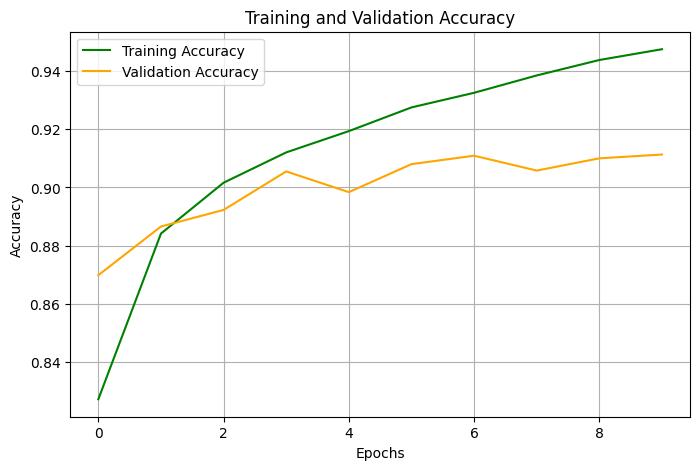

In [9]:
# Graphe de l'accuracy (entraînement + validation)
#Voir comment la précision évolue
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


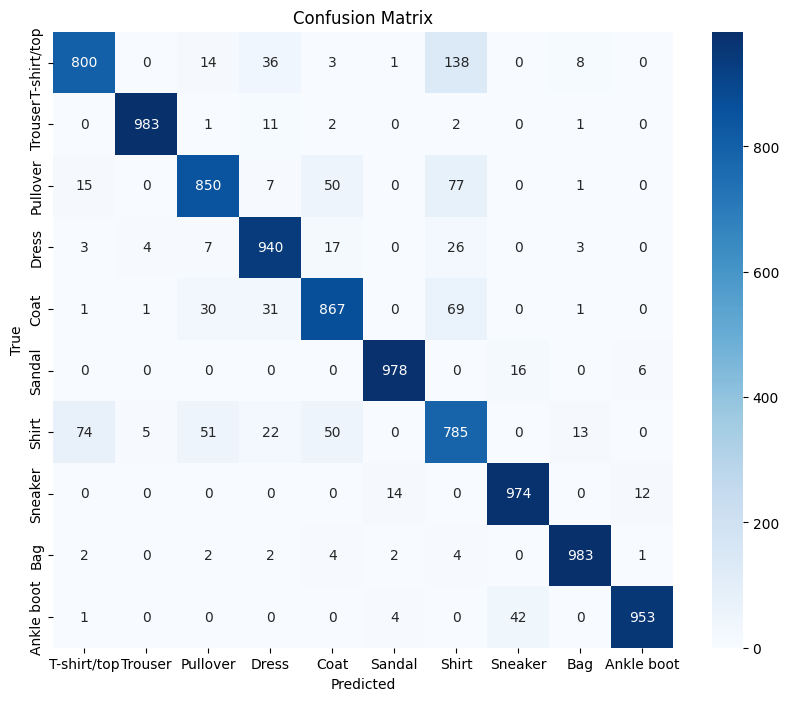

In [10]:
# Importer sklearn pour confusion matrix
#Voir où ton modèle se trompe entre classes (ex: confond T-shirt et pull)


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédire sur les données test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Créer matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Afficher la matrice de confusion joliment
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [11]:
# Rapport de classification
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.89      0.80      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.85      0.87      1000
       Dress       0.90      0.94      0.92      1000
        Coat       0.87      0.87      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.79      0.75      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [12]:
# Sauvegarder le modèle
model.save('fashion_mnist_cnn_model.h5')